In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns 
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [4]:
from scipy.stats import zscore
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
data = data[~outliers]

In [5]:
sns.set(style="whitegrid")

In [6]:
normal_columns = ['Age', 'Blood_Glucose_Level', 'Cholesterol_Level', 'Blood_Pressure', 'Diabetes_Complication_Risk']

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/6w/hr_754vs3vdd_427z47663b40000gn/T/ipykernel_26848/2830498286.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, norm.pdf(x, mean, std), 'r', label=f'Normal fit: $\mu={mean:.2f}$, $\sigma={std:.2f}$')
/var/folders/6w/hr_754vs3vdd_427z47663b40000gn/T/ipykernel_26848/2830498286.py:7: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, norm.pdf(x, mean, std), 'r', label=f'Normal fit: $\mu={mean:.2f}$, $\sigma={std:.2f}$')


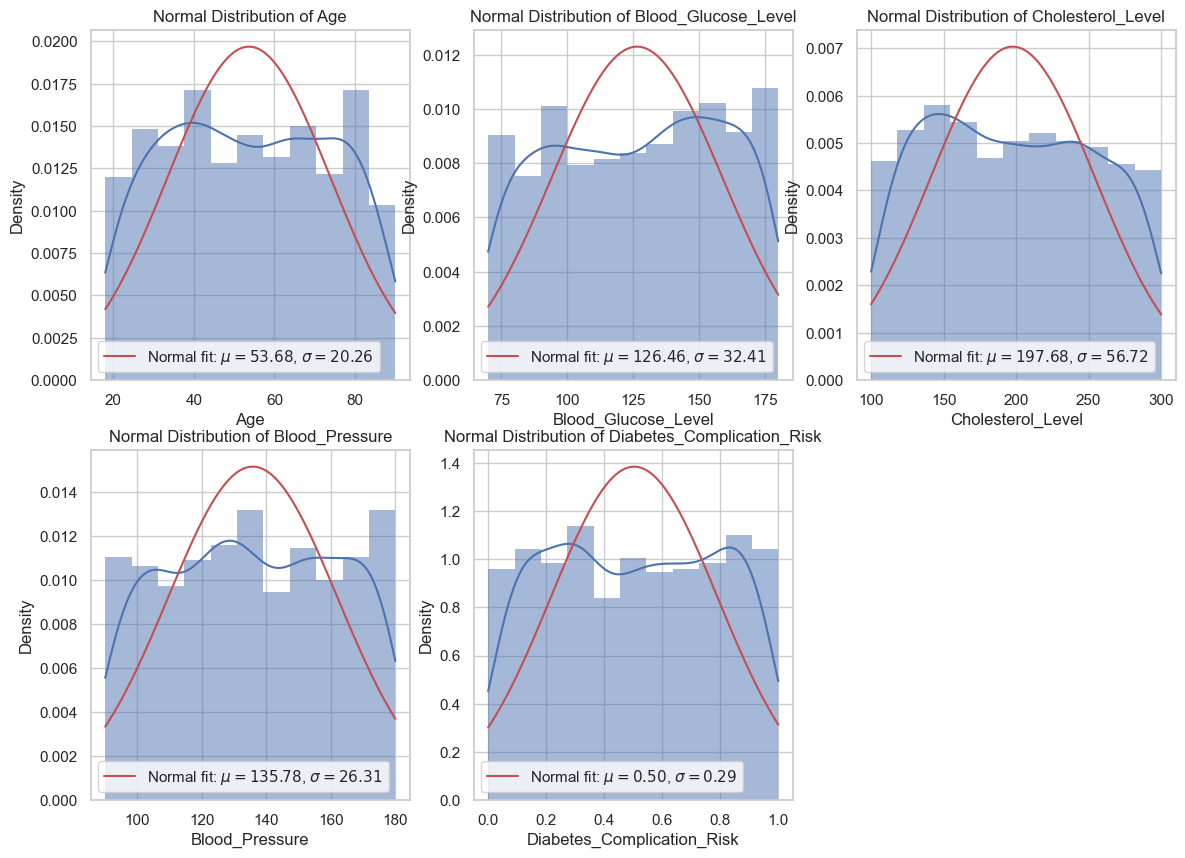

In [7]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(normal_columns, 1):
    plt.subplot(2, 3, i)
    mean, std = data[col].mean(), data[col].std()
    sns.histplot(data[col], kde=True, stat="density", linewidth=0)
    x = np.linspace(data[col].min(), data[col].max(), 100)
    plt.plot(x, norm.pdf(x, mean, std), 'r', label=f'Normal fit: $\mu={mean:.2f}$, $\sigma={std:.2f}$')
    plt.title(f'Normal Distribution of {col}')
    plt.legend()


In [8]:
from sklearn.preprocessing import LabelEncoder

# Instantiate label encoder
le = LabelEncoder()
data['Family_History_Diabetes'] = le.fit_transform(data['Family_History_Diabetes'])
data['Diabetes_Type'] = le.fit_transform(data['Diabetes_Type'])

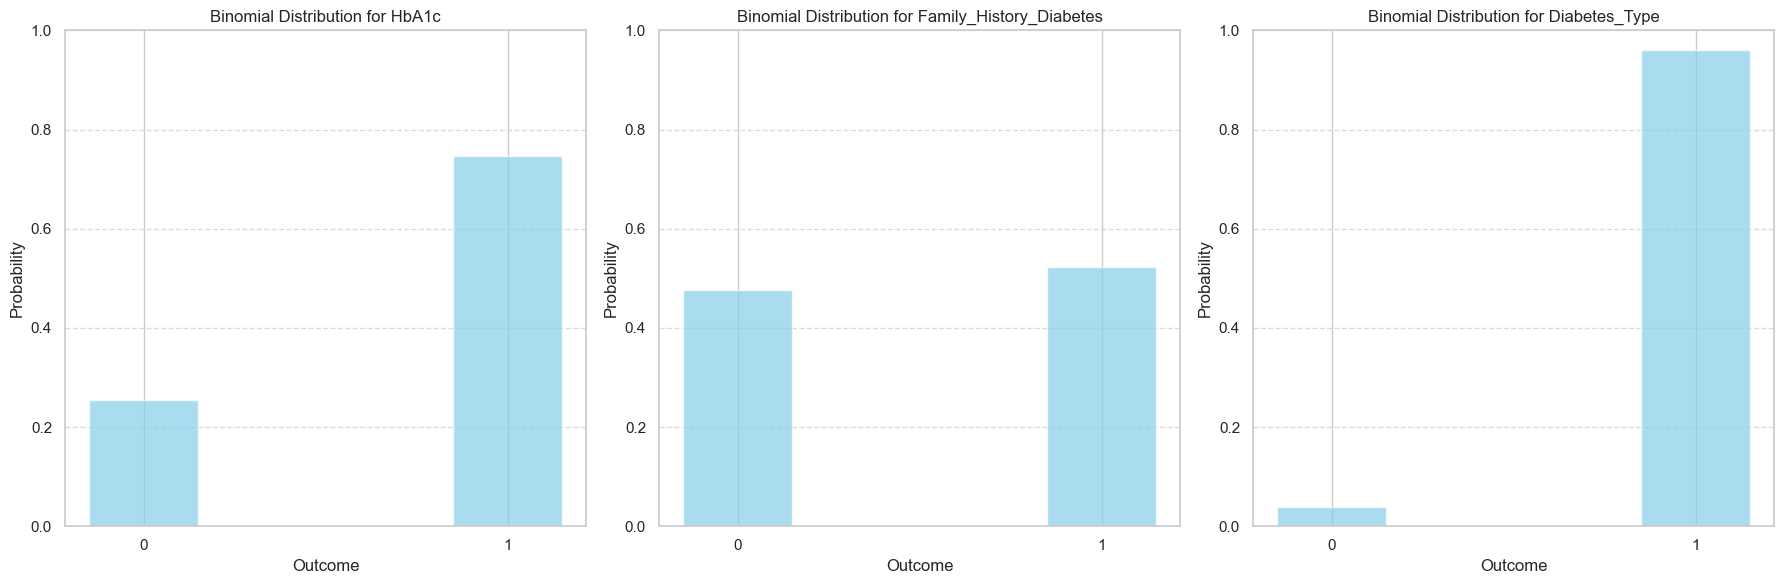

In [9]:
columns = ['HbA1c', 'Family_History_Diabetes', 'Diabetes_Type']  # Replace with your actual column names

# Set parameters for the binomial distribution
n = 1  # number of trials (1 for binary data)

# Create subplots
fig, axes = plt.subplots(1, len(columns), figsize=(18, 6))  # Create a subplot for each column

# Loop through each column and plot the binomial distribution
for i, column in enumerate(columns):
    p = data[column].mean()  # Probability of success (mean of the binary data)
    
    # Prepare data for plotting
    x = np.arange(0, 2)  # Possible outcomes for binary data (0 and 1)
    binom_dist = binom.pmf(x, n, p)  # Calculate binomial distribution
    
    # Plot the binomial distribution for the current column
    axes[i].bar(x, binom_dist, width=0.3, color='skyblue', alpha=0.7)
    
    # Customize each subplot
    axes[i].set_title(f'Binomial Distribution for {column}')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(x)  # Set x-ticks to be 0 and 1
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].set_ylim(0, 1)  # Set y-limit to 1 since probabilities cannot exceed 1

# Adjust layout
plt.tight_layout()
plt.show()

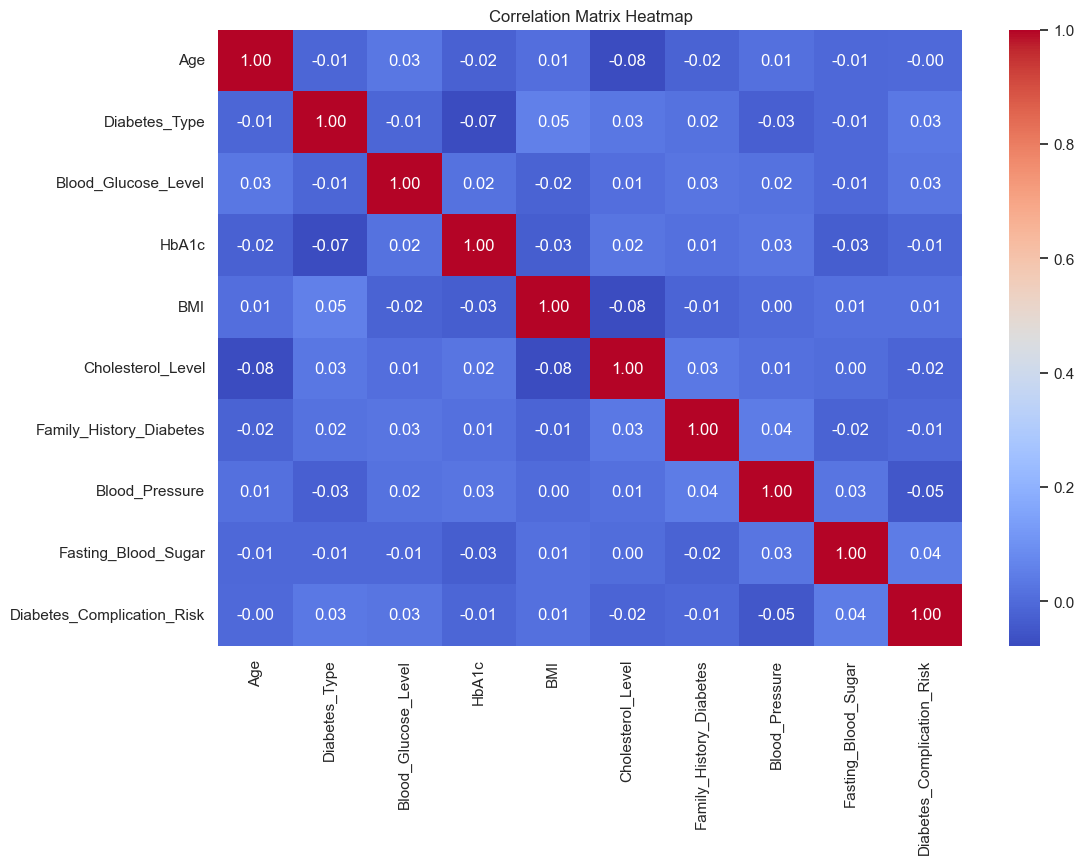

In [10]:
# Calculate correlation matrix including only numeric columns
correlation_matrix = data.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Create a DataFrame X with 'Age' as the input feature
X = pd.DataFrame(data['Age'])

# Split the data into training and testing sets, preserving the index
X_train, X_test, y_train, y_test = train_test_split(X, data['Blood_Glucose_Level'], test_size=0.25, random_state=42)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are defined as before
# Create a DataFrame X with 'Billing Amount' as the input feature
X = pd.DataFrame(data['Age'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Age'], test_size=0.25, random_state=42)

# Create a linear regression model
regr = LinearRegression()

# Fit the regressor on training data
regr.fit(X_train, y_train)

# Print the R-squared score on the test set
print("R-squared Score:", regr.score(X_test, y_test))


R-squared Score: 1.0


In [31]:
from sklearn.metrics import mean_squared_error

# Predict y values from X_test
y_pred = regr.predict(X_test)

# Print the number of predictions
print("Number of Predictions:", len(y_pred))

# Compute MSE for test data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Number of Predictions: 230
Mean Squared Error: 1.275347995640787e-28


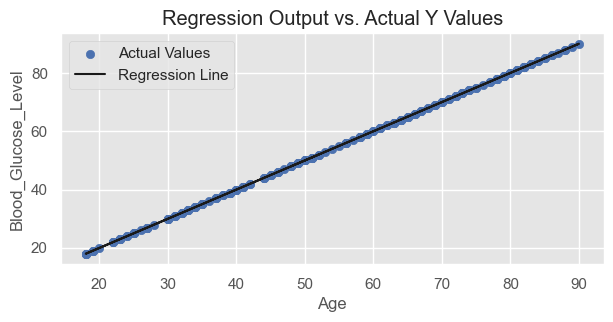

In [33]:
# Plotting the regression output vs. actual Y values
plt.figure(figsize=(7, 3))

# Scatter plot of actual values
plt.scatter(X_test, y_test, color='b', label="Actual Values")

# Plot the regression line
plt.plot(X_test, y_pred, color='k', label="Regression Line")

# Adding titles and labels for clarity
plt.xlabel('Age')
plt.ylabel('Blood_Glucose_Level')
plt.title('Regression Output vs. Actual Y Values')
plt.legend()

# Show the plot
plt.show()

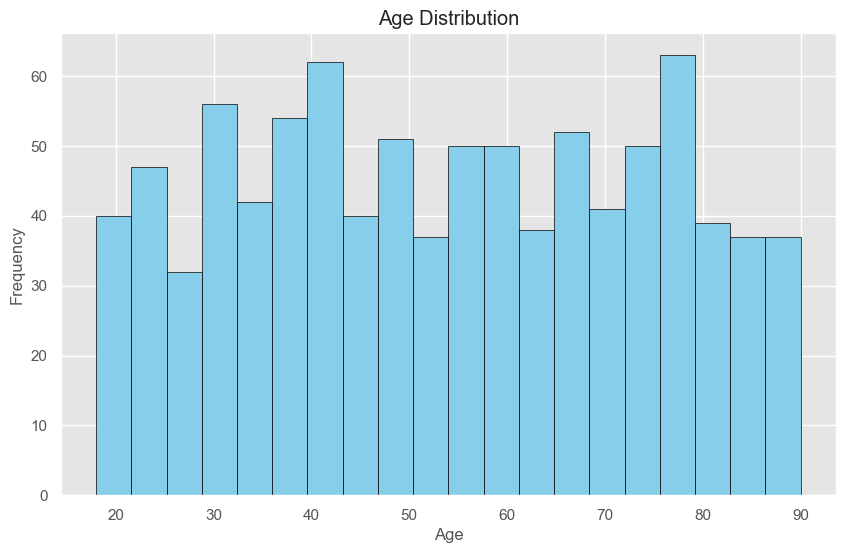

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


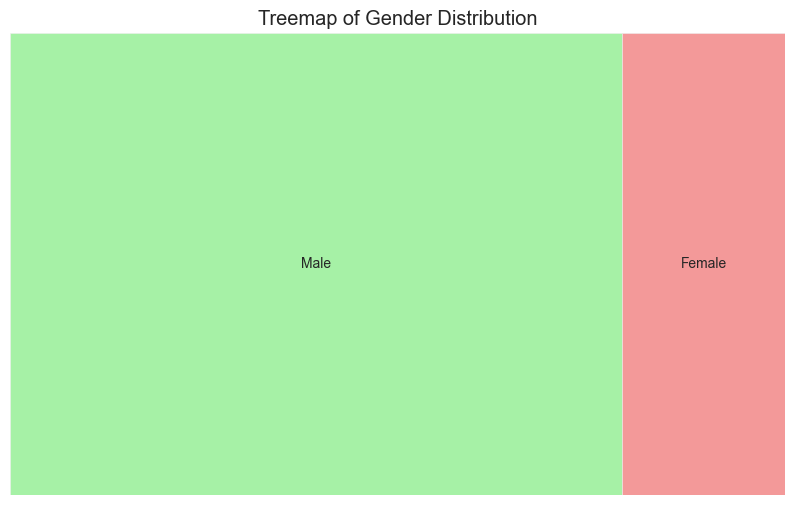

In [16]:
import squarify

sizes = data['Sex'].value_counts()
labels = ['Male', 'Female']

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=['lightgreen', 'lightcoral'], alpha=.8)
plt.title('Treemap of Gender Distribution')
plt.axis('off')
plt.show()


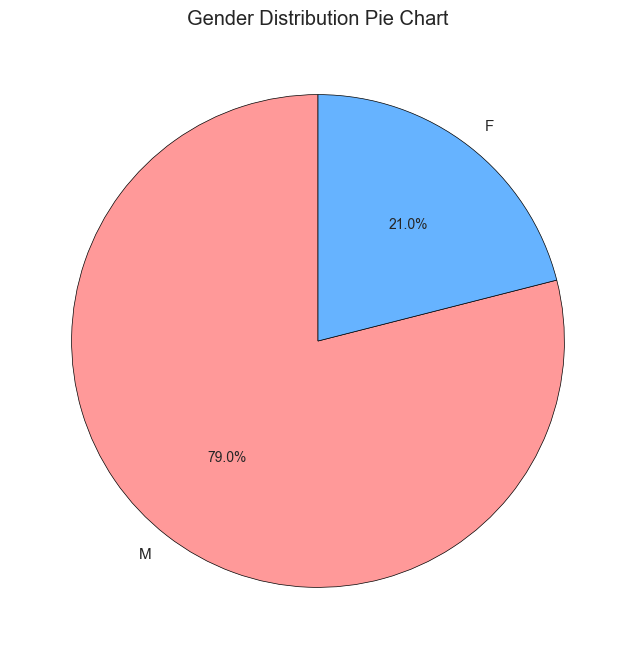

In [17]:
plt.figure(figsize=(8, 8))
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution Pie Chart')
plt.ylabel('')  # Hide y-label
plt.show()

<Figure size 1000x800 with 0 Axes>

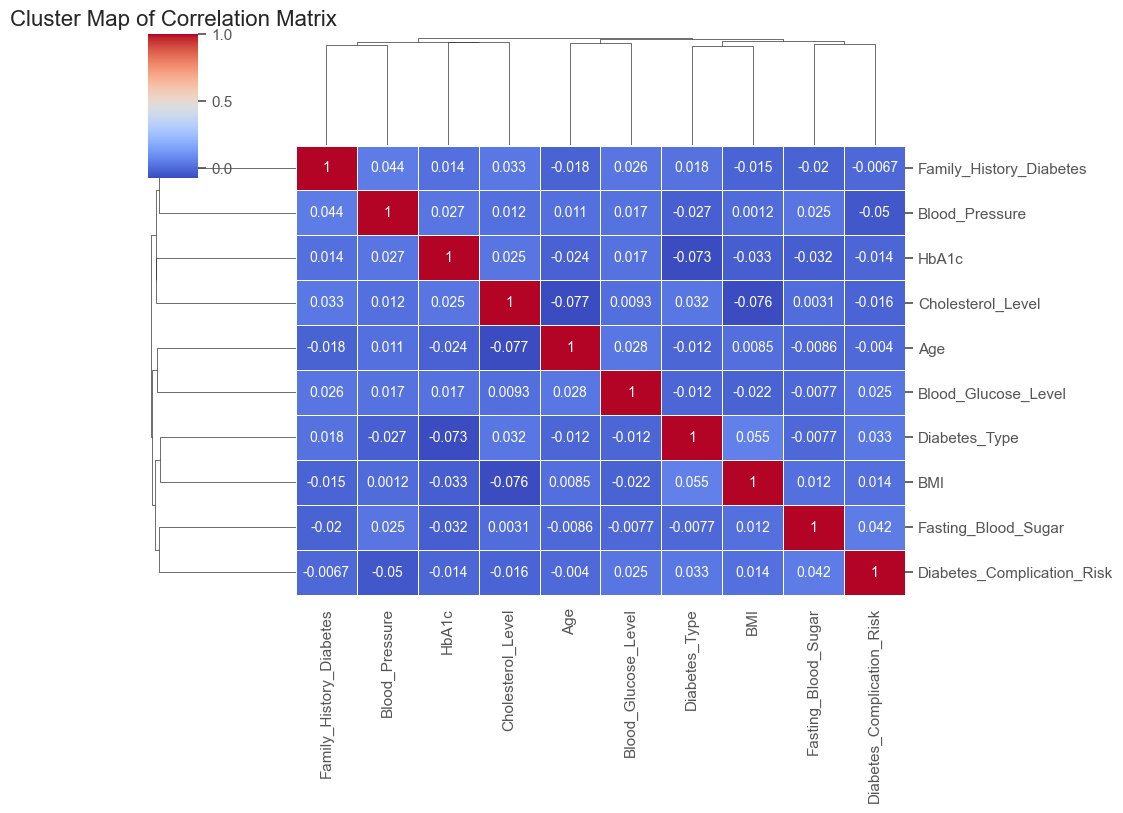

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the cluster map
plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 8))
plt.title('Cluster Map of Correlation Matrix', fontsize=16)
plt.show()


/var/folders/6w/hr_754vs3vdd_427z47663b40000gn/T/ipykernel_26848/1132380871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Sex', y='Age', data=data, palette='Set2')


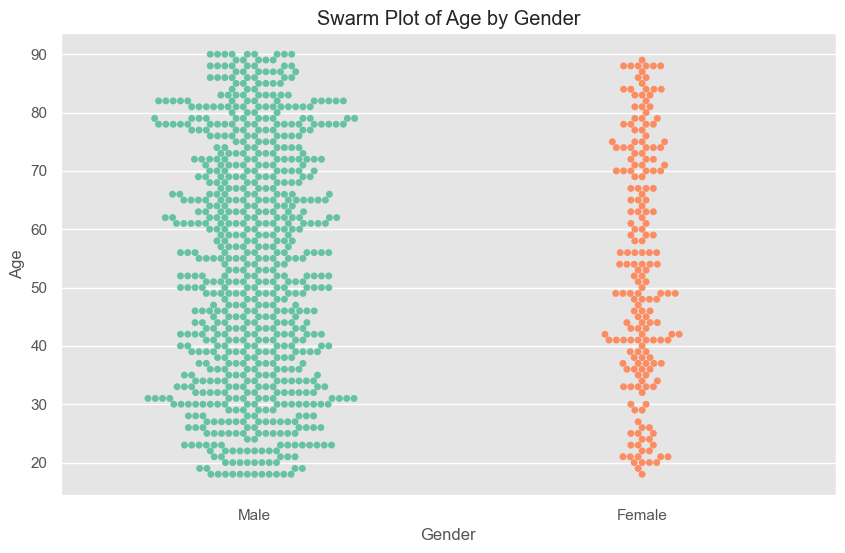

In [19]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='Age', data=data, palette='Set2')
plt.title('Swarm Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

/var/folders/6w/hr_754vs3vdd_427z47663b40000gn/T/ipykernel_26848/2779315909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Age', data=data, palette='muted')


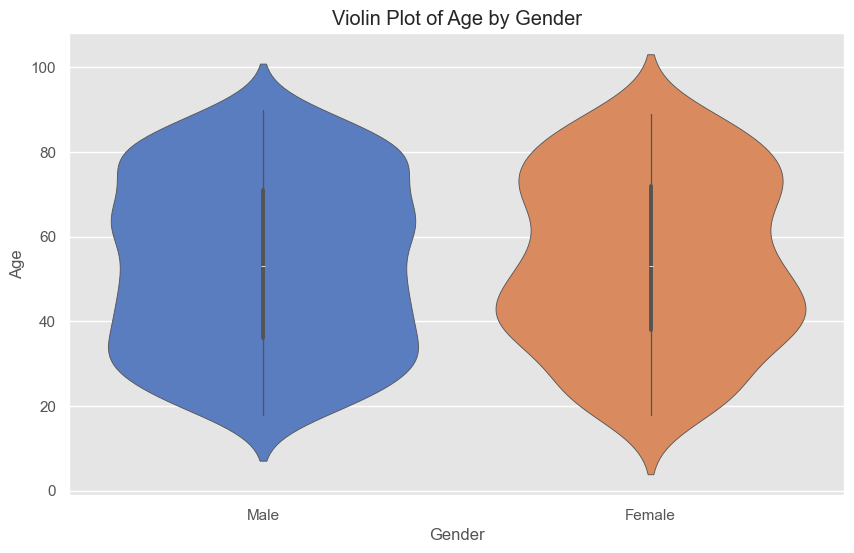

In [20]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sex', y='Age', data=data, palette='muted')
plt.title('Violin Plot of Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

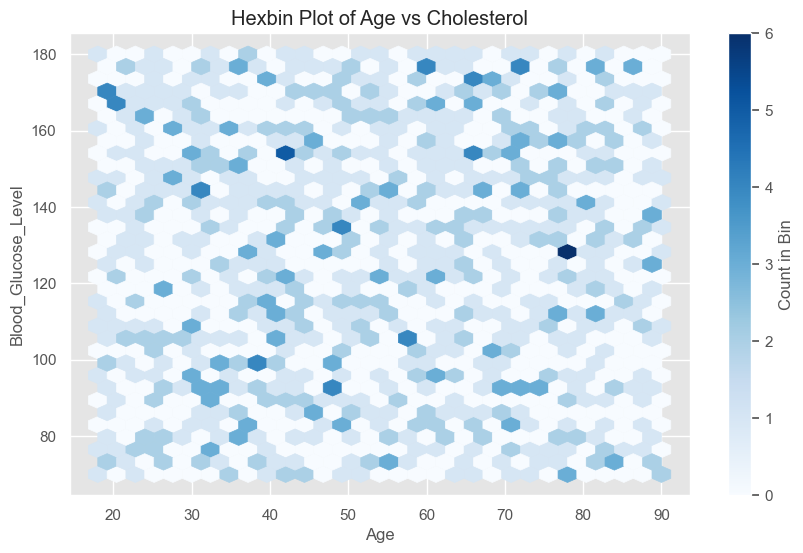

In [21]:
plt.figure(figsize=(10, 6))
plt.hexbin(data['Age'], data['Blood_Glucose_Level'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Blood_Glucose_Level')
plt.show()


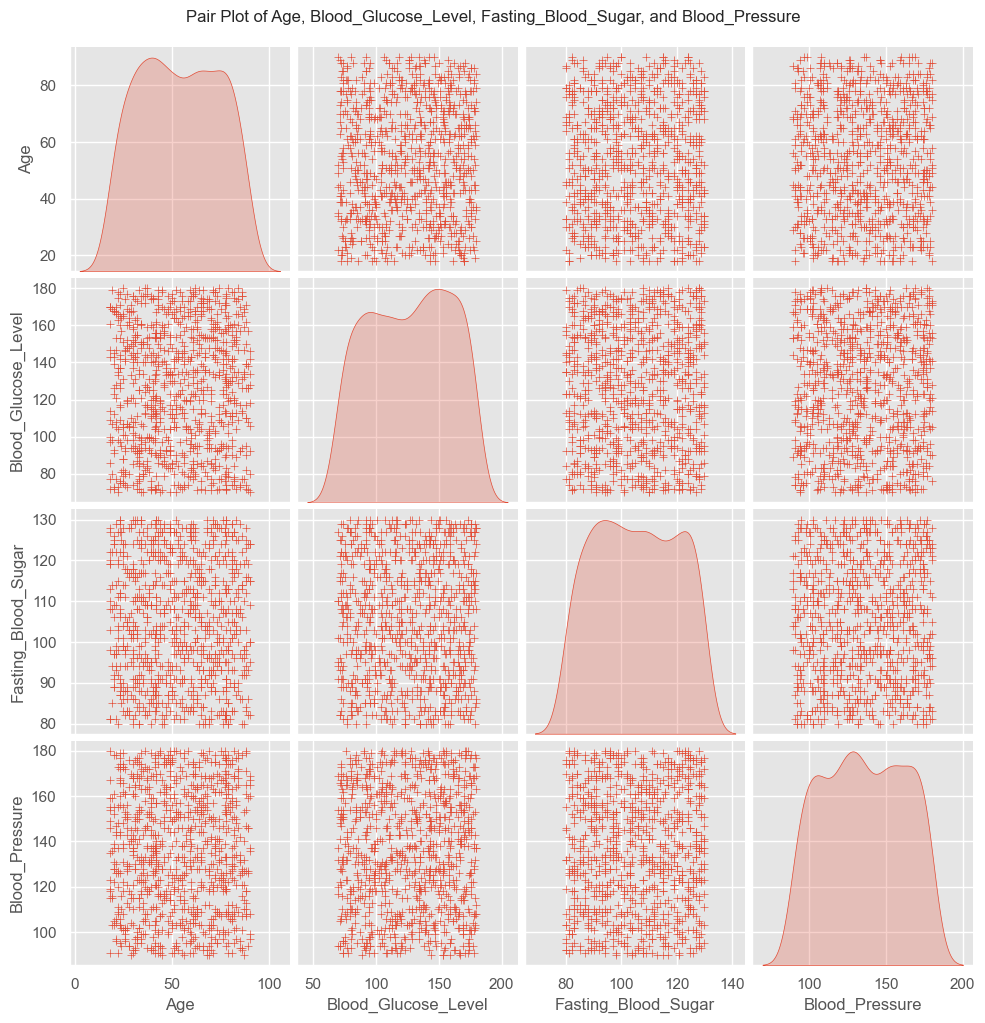

In [22]:
sns.pairplot(data[['Age', 'Blood_Glucose_Level', 'Fasting_Blood_Sugar', 'Blood_Pressure']], diag_kind='kde', markers='+')
plt.suptitle('Pair Plot of Age, Blood_Glucose_Level, Fasting_Blood_Sugar, and Blood_Pressure', y=1.02)
plt.show()


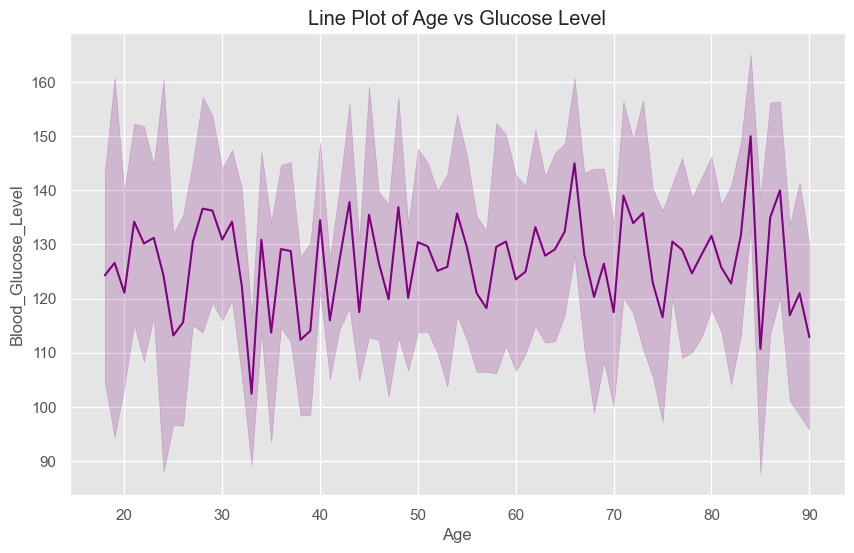

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Blood_Glucose_Level', data=data, color='purple')
plt.title('Line Plot of Age vs Glucose Level')
plt.xlabel('Age')
plt.ylabel('Blood_Glucose_Level')
plt.show()


/var/folders/6w/hr_754vs3vdd_427z47663b40000gn/T/ipykernel_26848/3771699990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family_History_Diabetes', data=data, palette='Set1')


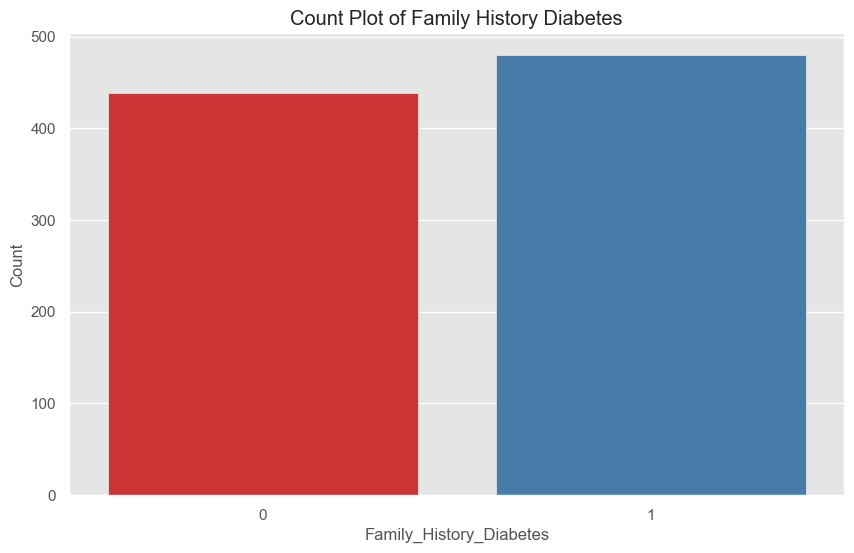

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_History_Diabetes', data=data, palette='Set1')
plt.title('Count Plot of Family History Diabetes')
plt.xlabel('Family_History_Diabetes')
plt.ylabel('Count')
plt.show()

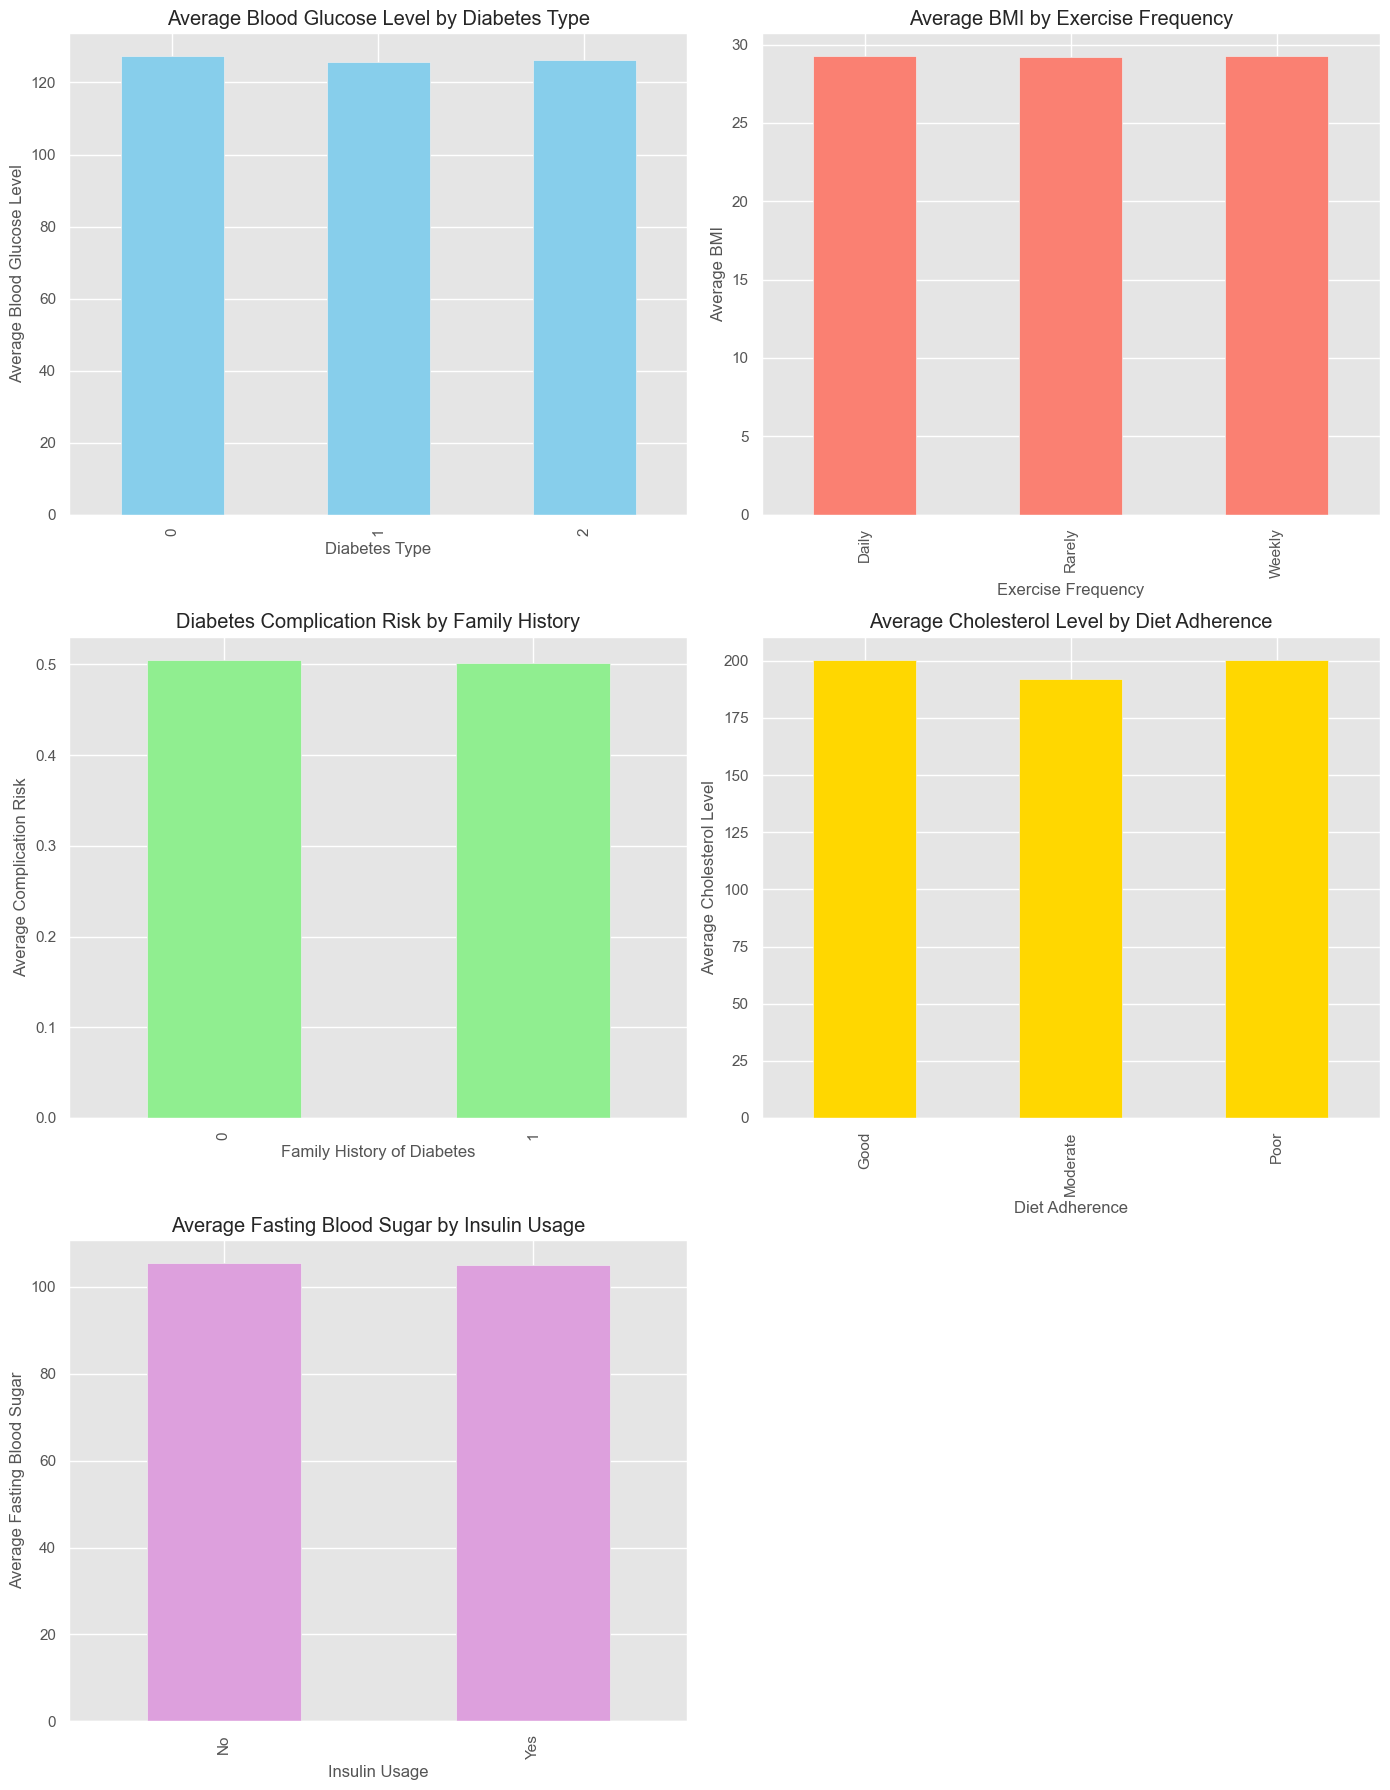

In [38]:
import matplotlib.pyplot as plt


avg_blood_glucose_by_type = data.groupby('Diabetes_Type')['Blood_Glucose_Level'].mean()
avg_bmi_by_exercise = data.groupby('Exercise_Frequency')['BMI'].mean()
complication_risk_family_history = data.groupby('Family_History_Diabetes')['Diabetes_Complication_Risk'].mean()
avg_cholesterol_by_diet = data.groupby('Diet_Adherence')['Cholesterol_Level'].mean()
avg_fasting_blood_sugar_by_insulin = data.groupby('Insulin_Usage')['Fasting_Blood_Sugar'].mean()

# Create a 3x2 grid for 5 plots
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# 1. Average blood glucose level for each type of diabetes
avg_blood_glucose_by_type.plot(kind='bar', color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Average Blood Glucose Level by Diabetes Type')
axs[0, 0].set_xlabel('Diabetes Type')
axs[0, 0].set_ylabel('Average Blood Glucose Level')

# 2. Average BMI by exercise frequency
avg_bmi_by_exercise.plot(kind='bar', color='salmon', ax=axs[0, 1])
axs[0, 1].set_title('Average BMI by Exercise Frequency')
axs[0, 1].set_xlabel('Exercise Frequency')
axs[0, 1].set_ylabel('Average BMI')

# 3. Diabetes complication risk by family history of diabetes
complication_risk_family_history.plot(kind='bar', color='lightgreen', ax=axs[1, 0])
axs[1, 0].set_title('Diabetes Complication Risk by Family History')
axs[1, 0].set_xlabel('Family History of Diabetes')
axs[1, 0].set_ylabel('Average Complication Risk')

# 4. Average cholesterol level by diet adherence
avg_cholesterol_by_diet.plot(kind='bar', color='gold', ax=axs[1, 1])
axs[1, 1].set_title('Average Cholesterol Level by Diet Adherence')
axs[1, 1].set_xlabel('Diet Adherence')
axs[1, 1].set_ylabel('Average Cholesterol Level')

# 5. Average fasting blood sugar by insulin usage
avg_fasting_blood_sugar_by_insulin.plot(kind='bar', color='plum', ax=axs[2, 0])
axs[2, 0].set_title('Average Fasting Blood Sugar by Insulin Usage')
axs[2, 0].set_xlabel('Insulin Usage')
axs[2, 0].set_ylabel('Average Fasting Blood Sugar')

# Adjust layout and show the plot
fig.delaxes(axs[2, 1])  # Remove the unused subplot
plt.tight_layout()
plt.show()
